# Лабораторная работа 3

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.datasets import *

In [2]:
data = pd.read_csv('data/HRDataset_v13.csv')

In [3]:
data.shape

(401, 35)

In [4]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,Accountant I,MA,1450.0,11/24/87,F,Married,US Citizen,No,Black or African American,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,Accountant I,MA,1460.0,04/26/84,M,Divorced,US Citizen,No,Black or African American,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,Accountant I,MA,2703.0,09/01/86,M,Single,US Citizen,No,White,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,Administrative Assistant,MA,2170.0,09/16/85,F,Married,US Citizen,No,White,2/16/2015,04/15/15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,Administrative Assistant,MA,2330.0,05/19/88,F,Single,US Citizen,No,White,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


## Обработка пропусков в данных

In [5]:
data.isnull().sum()

Employee_Name                  91
EmpID                          91
MarriedID                      91
MaritalStatusID                91
GenderID                       91
EmpStatusID                    91
DeptID                         91
PerfScoreID                    91
FromDiversityJobFairID         91
PayRate                        91
Termd                          91
PositionID                     91
Position                       91
State                          91
Zip                            91
DOB                            91
Sex                            91
MaritalDesc                    91
CitizenDesc                    91
HispanicLatino                 91
RaceDesc                       91
DateofHire                     91
DateofTermination             298
TermReason                     92
EmploymentStatus               91
Department                     91
ManagerName                    91
ManagerID                      99
RecruitmentSource              91
PerformanceSco

Удалим строки, в которых все значения пропущены.

In [6]:
data1 = data.dropna(axis=0, how='all')

In [7]:
data1.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
PayRate                         0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      1
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

В колонке TermReason всего одно пропущенное значение, поэтому заменим его на самое часто встречаемое.

In [8]:
data1.shape

(310, 35)

In [9]:
data1['TermReason'].dtype

dtype('O')

In [10]:
data1['TermReason'].unique()

array(['N/A - still employed', nan, 'career change', 'Another position',
       'attendance', 'relocation out of area',
       'N/A - Has not started yet', 'performance', 'no-call, no-show',
       'hours', 'medical issues', 'retiring', 'unhappy', 'more money',
       'return to school', 'gross misconduct', 'military',
       'maternity leave - did not return'], dtype=object)

In [11]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp = imp.fit(data1[['TermReason']])

In [12]:
data1.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
PayRate                         0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      1
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

Удалим колонки, в которых много пропущенных значений.

In [13]:
data2 = data1.dropna(axis=1, how='any')

In [14]:
data2.isnull().sum()

Employee_Name             0
EmpID                     0
MarriedID                 0
MaritalStatusID           0
GenderID                  0
EmpStatusID               0
DeptID                    0
PerfScoreID               0
FromDiversityJobFairID    0
PayRate                   0
Termd                     0
PositionID                0
Position                  0
State                     0
Zip                       0
DOB                       0
Sex                       0
MaritalDesc               0
CitizenDesc               0
HispanicLatino            0
RaceDesc                  0
DateofHire                0
EmploymentStatus          0
Department                0
ManagerName               0
RecruitmentSource         0
PerformanceScore          0
EngagementSurvey          0
EmpSatisfaction           0
SpecialProjectsCount      0
dtype: int64

## Кодирование категориальных признаков

In [15]:
data2.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,Accountant I,MA,1450.0,11/24/87,F,Married,US Citizen,No,Black or African American,10/27/2008,Active,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets,2.04,2.0,6.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,Accountant I,MA,1460.0,04/26/84,M,Divorced,US Citizen,No,Black or African American,1/6/2014,Active,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,5.00,4.0,4.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,Accountant I,MA,2703.0,09/01/86,M,Single,US Citizen,No,White,9/29/2014,Active,Admin Offices,Brandon R. LeBlanc,Internet Search,Fully Meets,3.90,5.0,5.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,Administrative Assistant,MA,2170.0,09/16/85,F,Married,US Citizen,No,White,2/16/2015,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,Administrative Assistant,MA,2330.0,05/19/88,F,Single,US Citizen,No,White,5/1/2015,Active,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,5.00,3.0,5.0


In [16]:
for col in data2.columns:
    dt = str(data2[col].dtype)
    if dt=='object' and len(data2[col].unique()) < 10:
        print('Колонка {}. Тип данных {}. Уникальные значения:\n{}\n'.format(col, dt, data2[col].unique()))

Колонка Sex. Тип данных object. Уникальные значения:
['F' 'M ']

Колонка MaritalDesc. Тип данных object. Уникальные значения:
['Married' 'Divorced' 'Single' 'Widowed' 'Separated']

Колонка CitizenDesc. Тип данных object. Уникальные значения:
['US Citizen' 'Eligible NonCitizen' 'Non-Citizen']

Колонка HispanicLatino. Тип данных object. Уникальные значения:
['No' 'Yes' 'yes' 'no']

Колонка RaceDesc. Тип данных object. Уникальные значения:
['Black or African American' 'White' 'Asian'
 'American Indian or Alaska Native' 'Two or more races' 'Hispanic']

Колонка EmploymentStatus. Тип данных object. Уникальные значения:
['Active' 'Terminated for Cause' 'Voluntarily Terminated' 'Future Start'
 'Leave of Absence']

Колонка Department. Тип данных object. Уникальные значения:
['Admin Offices' 'Sales' 'IT/IS' 'Production       ' 'Executive Office'
 'Software Engineering']

Колонка PerformanceScore. Тип данных object. Уникальные значения:
['Fully Meets' 'PIP' 'Exceeds' 'Needs Improvement']



In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_le = le.fit_transform(data2['MaritalDesc'])

In [18]:
np.unique(data_le)

array([0, 1, 2, 3, 4])

In [19]:
data_le

array([1, 0, 3, 1, 3, 1, 1, 3, 3, 1, 3, 4, 1, 3, 2, 3, 3, 1, 1, 3, 1, 3,
       3, 3, 1, 3, 3, 1, 3, 3, 1, 2, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3,
       1, 0, 1, 1, 1, 1, 0, 1, 3, 3, 1, 3, 3, 0, 1, 3, 3, 3, 3, 1, 0, 1,
       1, 2, 3, 1, 1, 1, 1, 1, 0, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 0, 1, 1,
       3, 3, 3, 1, 1, 3, 1, 1, 4, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 0, 3,
       1, 1, 2, 1, 4, 1, 0, 3, 1, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 0, 3,
       4, 1, 3, 3, 1, 3, 0, 1, 1, 1, 0, 1, 0, 1, 3, 3, 3, 3, 1, 3, 1, 3,
       0, 2, 3, 3, 1, 3, 3, 1, 1, 4, 0, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3,
       0, 3, 1, 2, 3, 1, 3, 1, 0, 3, 1, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3,
       1, 1, 1, 3, 1, 3, 3, 0, 3, 1, 3, 0, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 3, 3, 0, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 0, 1, 0, 3,
       3, 1, 3, 3, 3, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 0, 3, 1, 3, 1, 3,
       2, 1, 3, 1, 3, 3, 2, 1, 4, 2, 3, 3, 3, 2, 1, 1, 4, 3, 3, 0, 3, 3,
       3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1,

In [20]:
data2.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,Accountant I,MA,1450.0,11/24/87,F,Married,US Citizen,No,Black or African American,10/27/2008,Active,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets,2.04,2.0,6.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,Accountant I,MA,1460.0,04/26/84,M,Divorced,US Citizen,No,Black or African American,1/6/2014,Active,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,5.00,4.0,4.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,Accountant I,MA,2703.0,09/01/86,M,Single,US Citizen,No,White,9/29/2014,Active,Admin Offices,Brandon R. LeBlanc,Internet Search,Fully Meets,3.90,5.0,5.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,Administrative Assistant,MA,2170.0,09/16/85,F,Married,US Citizen,No,White,2/16/2015,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,Administrative Assistant,MA,2330.0,05/19/88,F,Single,US Citizen,No,White,5/1/2015,Active,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,5.00,3.0,5.0


## Масштабирование данных

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc_data = sc.fit_transform(data2[['EngagementSurvey']])

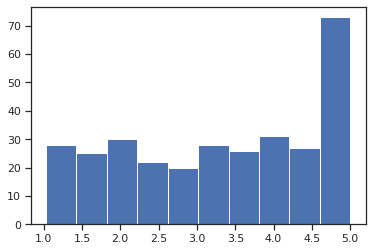

In [22]:
plt.hist(data2['EngagementSurvey'], 10)
plt.show()

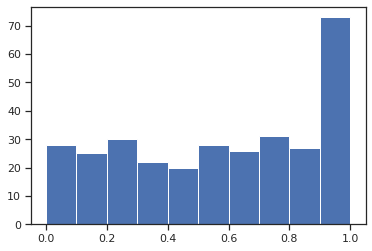

In [23]:
plt.hist(sc_data, 10)
plt.show()